In [53]:
import pandas as pd
import matplotlib.pyplot as plt

PATH = '/content/unicorns till sep 2022.csv'

df = pd.read_csv(PATH)

In [3]:
df.head(10)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
5,Checkout.com,$40,5/2/2019,United Kingdom,London,Fintech,"Tiger Global Management, Insight Partners, DST..."
6,Instacart,$39,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By..."
7,Databricks,$38,2/5/2019,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates..."
8,Revolut,$33,4/26/2018,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital"
9,Epic Games,$31.50,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1186 non-null   object
 1   Valuation ($B)  1186 non-null   object
 2   Date Joined     1186 non-null   object
 3   Country         1186 non-null   object
 4   City            1186 non-null   object
 5   Industry        1186 non-null   object
 6   Investors       1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [6]:
df.describe()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
count,1186,1186,1186,1186,1186,1186,1168
unique,1183,222,695,48,286,34,1152
top,Bolt,$1,7/13/2021,United States,San Francisco,Fintech,Sequoia Capital
freq,2,271,9,636,168,239,3


In [15]:
# tratamento da base de dados

df['Valuation ($B)'] = df['Valuation ($B)'].apply(lambda x? float(x.split(sep='$')[1]))
df['Valuation ($B)']

df['Date Joined'] = pd.to_datetime(df['Date Joined'])
df['Date Joined']

0      2017-04-07
1      2012-12-01
2      2018-07-03
3      2014-01-23
4      2018-01-08
          ...    
1181          NaT
1182          NaT
1183          NaT
1184          NaT
1185          NaT
Name: Date Joined, Length: 1186, dtype: datetime64[ns]

In [16]:
# quantidade de empresas por setor
df['Industry'].value_counts()

Industry
Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail            

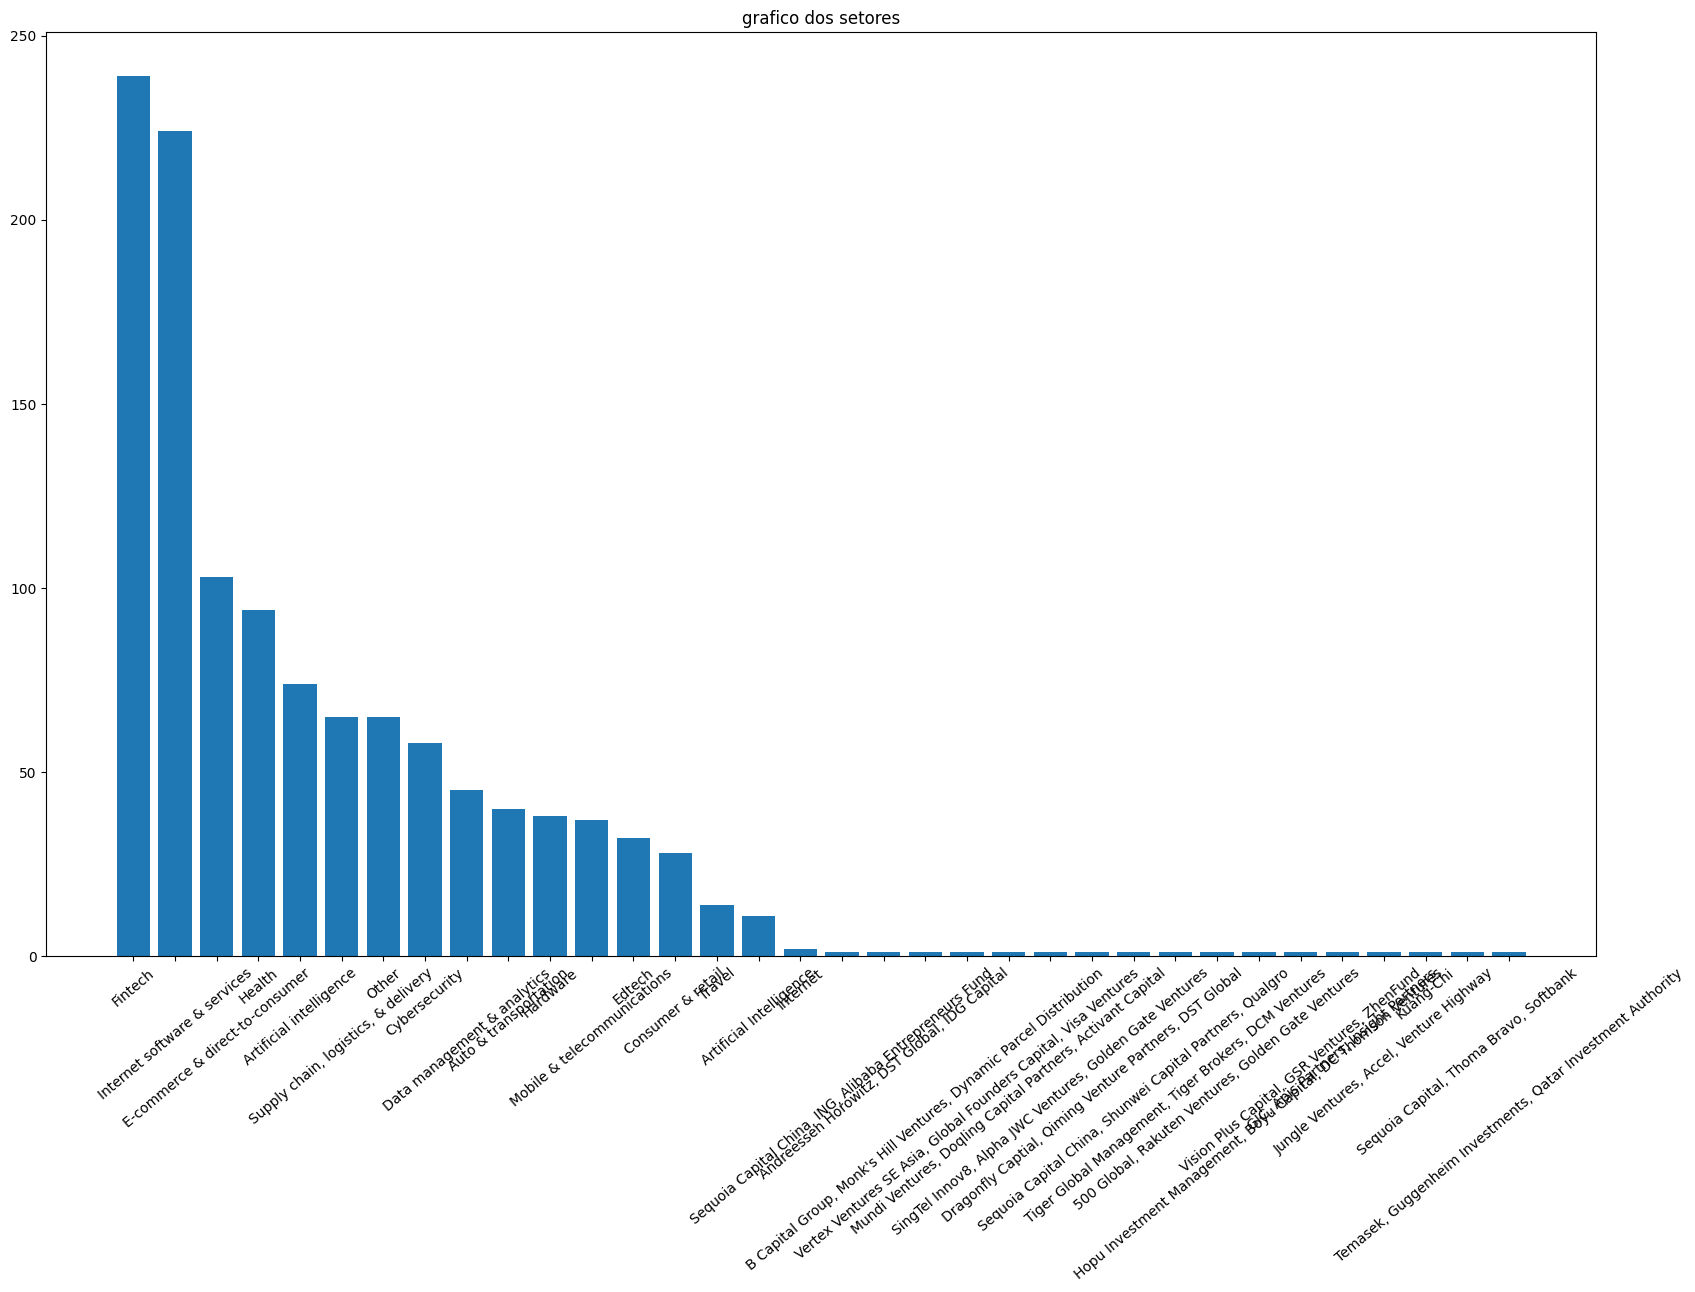

In [26]:
# grafico de barra
plt.figure(figsize=(20,12))
plt.title('grafico dos setores')
plt.bar(df['Industry'].value_counts().index, df['Industry'].value_counts())
plt.xticks(rotation=40)
plt.show()

In [49]:
# valor dos setores
analise_valor_setor = df[['Industry', 'Valuation ($B)']].groupby('Valuation ($B)').sum()
setor_mais_valorisado = analise_valor_setor.sort_values('Valuation ($B)', ascending=False)
setor_mais_valorisado.head()

,Industry
Valuation ($B),
140.0,Artificial intelligence
127.0,Other
100.0,E-commerce & direct-to-consumer
95.0,Fintech
40.0,Internet software & servicesFintech


In [50]:
# criação de outro dataframe
df_valor_setor = setor_mais_valorisado.copy()
df_valor_setor.to_csv('valor_industria_2022.csv', ',', index=False)

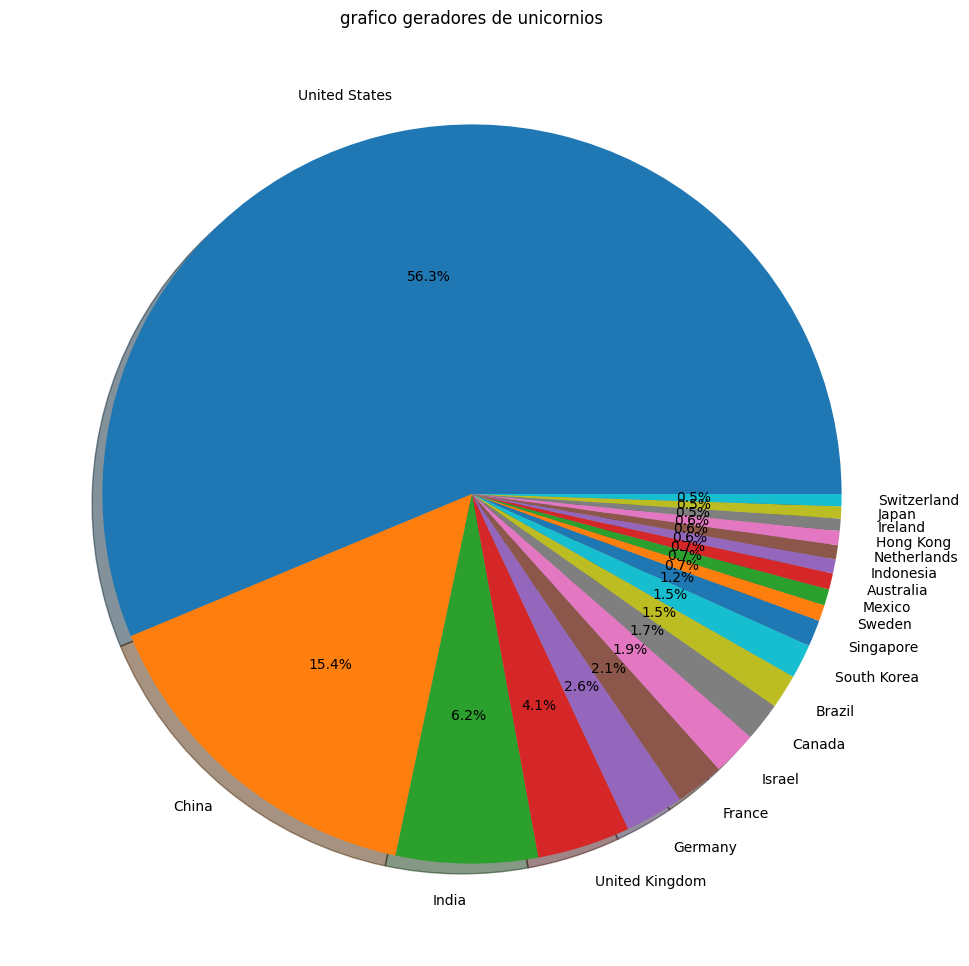

In [58]:
# analise setor e pais
analise_pais = df['Country'].value_counts(normalize=True)

plt.figure(figsize=(18,12))
plt.title('grafico geradores de unicornios')
plt.pie(
    analise_pais.head(20),
    labels=analise_pais.index[0:20],
     autopct='%1.1f%%',
    shadow=True
)
plt.show()